<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [9]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [10]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [11]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'svd_dot_u', 'svd_dot_v', 'pref_attach_followers',
       'pref_attach_followees'],
      dtype='object')

In [12]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [13]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9228422152560082 test Score 0.909429254160587
Estimators =  50 Train Score 0.9211569886653413 test Score 0.8946616941928609
Estimators =  100 Train Score 0.9211213469532703 test Score 0.9163765988676873
Estimators =  250 Train Score 0.9210900573053917 test Score 0.9168206247900571
Estimators =  450 Train Score 0.9210504307100444 test Score 0.9166789063975324


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

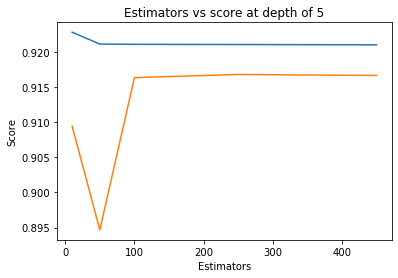

In [14]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.9077572472014732 test Score 0.8936535522100547
depth =  9 Train Score 0.9577898569199549 test Score 0.9241951795044665
depth =  11 Train Score 0.9610363220726442 test Score 0.9251357151874764
depth =  15 Train Score 0.9626594825395213 test Score 0.9252403440715129
depth =  20 Train Score 0.9630412041315851 test Score 0.92533541144506
depth =  35 Train Score 0.9628628892997176 test Score 0.9254555028962612
depth =  50 Train Score 0.9628628892997176 test Score 0.9254555028962612
depth =  70 Train Score 0.9628628892997176 test Score 0.9254555028962612
depth =  130 Train Score 0.9628628892997176 test Score 0.9254555028962612


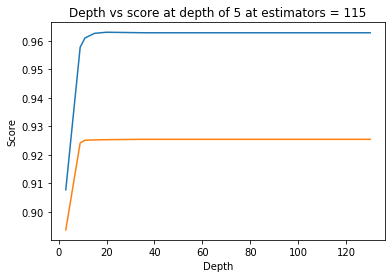

In [15]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [16]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

params  = {
        "n_estimators":sp_randint(105,125),
        "max_depth": sp_randint(10,15),
        "min_samples_split": sp_randint(110,190),
        "min_samples_leaf": sp_randint(25,65)
            }

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25, return_train_score = True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96179738 0.96172552 0.96004452 0.96168783 0.96303476]
mean train scores [0.9628077  0.96252858 0.96065268 0.9624018  0.9641399 ]


In [17]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [19]:
print(rf_random.best_params_)

{'max_depth': 14, 'min_samples_leaf': 28, 'min_samples_split': 111, 'n_estimators': 121}


In [28]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [29]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [30]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9639561911915469
Test f1 score 0.9265541479018478


In [31]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


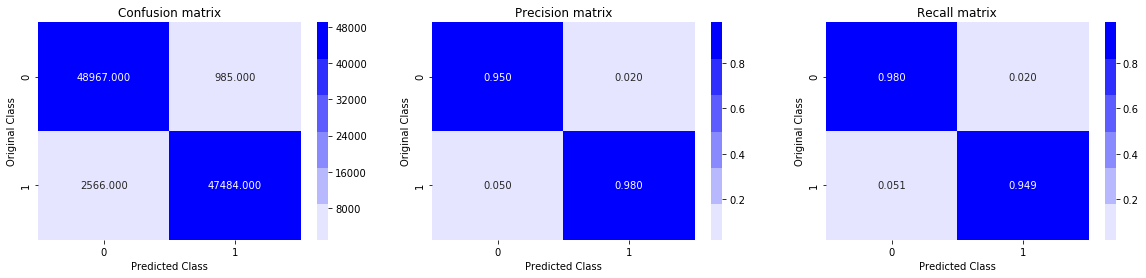

Test confusion_matrix


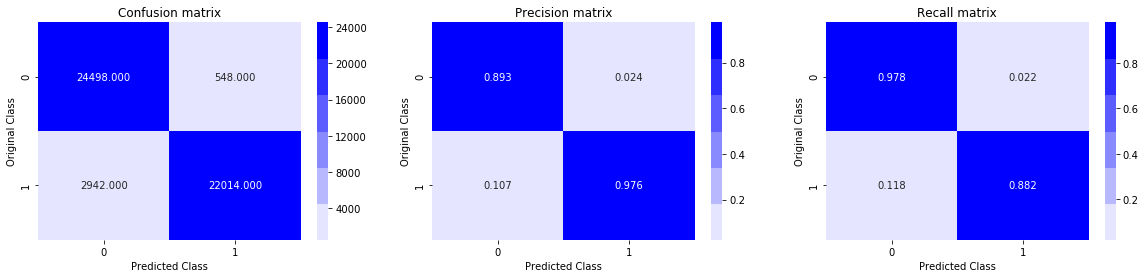

In [32]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

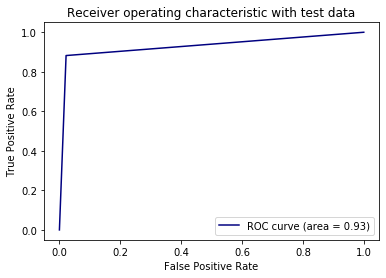

In [33]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

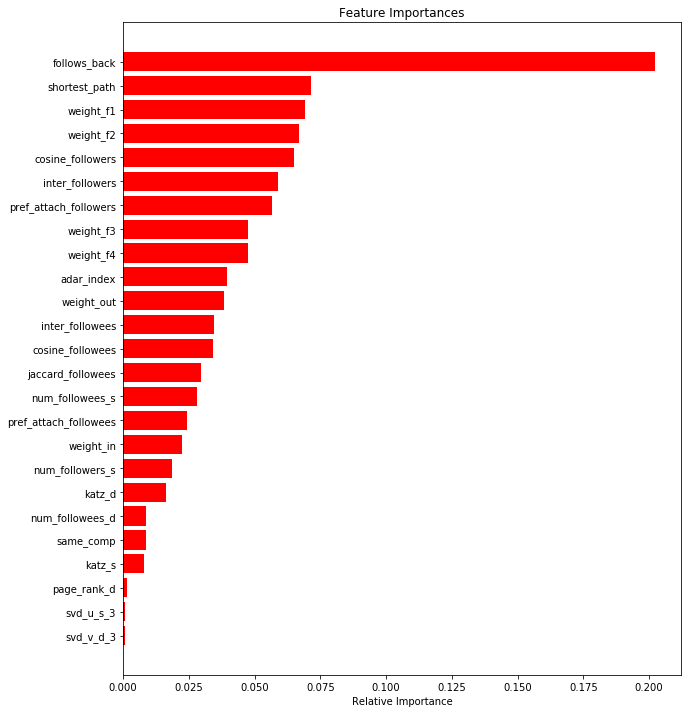

In [34]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [35]:
import xgboost as xgb
import scipy.stats as ss

params = {
        "learning_rate":ss.uniform(0.01,0.3),
        "max_depth": sp_randint(2,12),
        "n_estimators":ss.randint(100,200),
        "gamma":ss.uniform(0,1)
         }

xgb_clf = xgb.XGBClassifier(random_state=25,n_jobs=-1)

xgb_model = RandomizedSearchCV(xgb_clf, param_distributions=params,n_jobs=-1,
                            n_iter=10,cv=4,scoring='f1',random_state=25,return_train_score = True)


xgb_model.fit(df_final_train,y_train)
print('mean test scores',xgb_model.cv_results_['mean_test_score'])
print('mean train scores',xgb_model.cv_results_['mean_train_score'])

mean test scores [0.98196735 0.97551829 0.97423598 0.96737381 0.97434986 0.97726697
 0.97465043 0.98245195 0.97304815 0.98198564]
mean train scores [0.99871009 0.97794393 0.97468058 0.96826862 0.97510516 0.97974165
 0.97533689 0.99782634 0.97343023 1.        ]


In [36]:
xgb_model.cv_results_

{'mean_fit_time': array([299.39806575, 452.25716215, 228.00317597, 414.67110837,
        203.85119468, 440.9305768 , 381.47212797, 571.6795938 ,
        162.71271676, 555.96219838]),
 'std_fit_time': array([0.76428942, 1.81792421, 0.72418831, 0.62128842, 0.25466484,
        0.77586188, 1.31205643, 1.56087382, 0.54294639, 2.15890855]),
 'mean_score_time': array([0.93821365, 1.22555029, 0.8395195 , 0.87700027, 0.75007141,
        1.2149334 , 0.96894628, 1.4774068 , 0.63064051, 1.33098972]),
 'std_score_time': array([0.12196867, 0.10881695, 0.08807424, 0.0488319 , 0.04214386,
        0.04995765, 0.07102326, 0.09913051, 0.02824114, 0.08155687]),
 'param_gamma': masked_array(data=[0.8701241366272119, 0.4111001279251132,
                    0.175190743477861, 0.9465064414817147,
                    0.4068064999728285, 0.3620603583692479,
                    0.2565871587495725, 0.5142444882517789,
                    0.7199300263673346, 0.28170075378898063],
              mask=[False, False, 

In [37]:
print(xgb_model.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5142444882517789,
              learning_rate=0.17771598229854121, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=198, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=25,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [38]:
print(xgb_model.best_params_)

{'gamma': 0.5142444882517789, 'learning_rate': 0.17771598229854121, 'max_depth': 6, 'n_estimators': 198}


In [ ]:
#results = pd.DataFrame.from_dict(model.cv_results_)
#results = results.sort_values(['param_max_depth','param_n_estimators'])

#train_auc =results['mean_train_score']
#train_auc_std= results['std_train_score']
#cv_auc = results['mean_test_score'] 
#cv_auc_std= results['std_test_score']

#results_score_sorted = results.sort_values(by=['mean_test_score'],ascending=False)
#results_score_sorted.head()

In [39]:
clf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.5142444882517789, learning_rate=0.17771598229854121, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=198,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [40]:
clf.fit(df_final_train,y_train)

y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [41]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9961461075686443
Test f1 score 0.9118958867509858


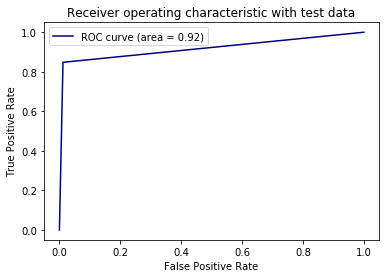

In [42]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

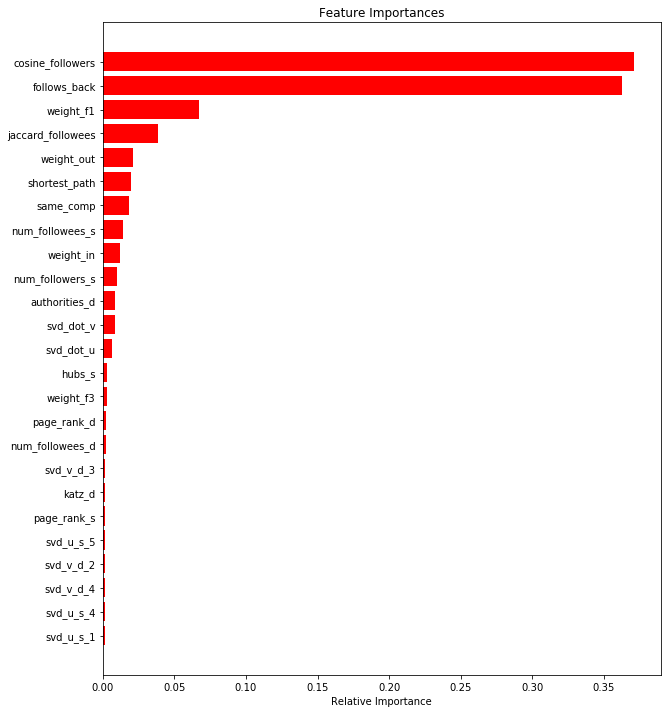

In [43]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [58]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.title = 'Model Comparison Table'
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "F1-Score"]

x.add_row(["Graph Based features", "Random Forest", "Max Depth:14, Estimators : 111,\n min_samples_leaf:28, min_samples_split:111", 0.92])
x.add_row(["Graph Based features", "XGBoost", "Max Depth:6, gamma=0.514, estimators: 198,\n learning_rate: 0.177 ", 0.91])
x.hrules=1
print(x)

+-----------------------------------------------------------------------------------------------+
|                                     Model Comparison Table                                    |
+----------------------+---------------+---------------------------------------------+----------+
|      Vectorizer      |     Model     |               Hyper Parameter               | F1-Score |
+----------------------+---------------+---------------------------------------------+----------+
| Graph Based features | Random Forest |       Max Depth:14, Estimators : 111,       |   0.92   |
|                      |               |  min_samples_leaf:28, min_samples_split:111 |          |
+----------------------+---------------+---------------------------------------------+----------+
| Graph Based features |    XGBoost    |  Max Depth:6, gamma=0.514, estimators: 198, |   0.91   |
|                      |               |             learning_rate: 0.177            |          |
+-------------------